In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# 数据探索
通过检验数据集的数据质量、绘制图表、计算某些特征量等手段，对样本数据集的结构和规律进行分析的过程就是数据探索。数据探索有助于选择合适的数据预处理和建模方法

## 数据质量分析
数据质量分析的主要任务是检查原始数据中是否存在涨数据，涨数据一般是指不符合要求，以及不能直接进行相应分析的数据。在常见的数据挖掘工作中，涨数据包括如下内容：
- 缺失值
- 异常值
- 不一致的值
- 重复数据及含有特殊符号（如 #、￥、*）的数据

### 缺失值分析
数据的缺失主要包括记录的缺失和记录中某个字段信息的缺失，两者都会造成分析结果的不准确。

**（1）缺失值产生的原因**
- 有些信息暂时无法获取，或者获取信息的代价太大。
- 有些信息是被遗漏的，这可能是人为的或者某些意外造成的。例如忘记填写或设备故障等。
- 属性值不存在。在某些情况下，对一些对象来说某些属性值是不存在的，如一个未婚者的配偶姓名、一个儿童的固定收入等。

**（2）缺失值的影响**
- 数据挖掘建模将丢失大量的有用信息。
- 数据挖掘模型所表现数的不确定性更加显著，模型中蕴含的规律更难把握。
- 包含空值的数据会使建模过程陷入混乱，导致不可靠的输出。

**（3）缺失值分析**
- 使用简单的统计分析，可以得到含有缺失值的属性个数，以及每个属性的未缺失数，缺失数于缺失率等。
- 对于缺失值的处理后面会单独讲。

### 异常值分析
异常值分析是检验数据是否有录入错误以及含有不合常理的数据。异常值是指样本中的个别 值，其数值明显偏离其余的观测值。异常值也称为离群点。

**（1）简单统计量分析**
- 可以先对变量做一个描述性统计，例如用最大值和最小值来判断这个变量的取值是否超出了合理的范围。

**（2)3$\sigma$原则**
- 如果数据服从正态分布，在3$\sigma$原则下，异常值被定义为一组观测值中于平均值的偏差超过3倍标准差的值。在标准正态分布的假设下，距离平均值3$\sigma$之外的值出现的概率为$P(|x-\mu|>3\sigma) \le 0.003$，属于极个别的小概率事件。
- 如果数据不服从正态分布，也可以用远离平均值的多少倍标准差来描述。

**（3）箱型图分析**
- 箱型图提供了识别异常值的一个标准：异常值通常被定义为小于$Q_L - 1.5IQR$或大于$Q_U +1.5IQR$的值。$Q_L$称为下四分位数，表示全部观察值中有四分之一的数据取值比它小；$Q_U$称为上四分为数，表示全部观察值中有四分之一的数据取值比它大；$IQR$称为四分位数间距，是上四分位数$Q_U$与下四分位数$Q_L$之差，期间包含了全部观察值的一半。&nbsp;箱线图真实客观地表现数据分布的本来面貌；它判断异常值的标准以四分位数和四分位距为基础，四分位数具有一定的鲁棒性，在识别异常值方面有一定的优越性。

In [2]:
data = pd.read_excel('data/catering_sale.xls', index_col=u'日期') # 读取餐饮数据，指定“日期”列为索引列。
data.describe() # 查看数据的基本情况

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


[   22.      51.      60.     865.    4060.3   4065.2   6607.4   9106.44]


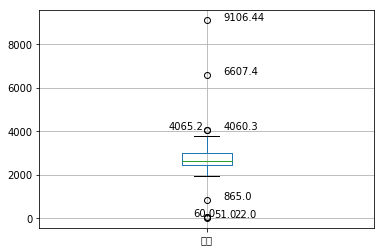

In [3]:
def programmer_1(data):
    plt.figure()
    # 画箱线图
    p = data.boxplot(return_type='dict')
    x = p['fliers'][0].get_xdata()
    y = p['fliers'][0].get_ydata()
    y.sort()
    print(y)

    for i in range(len(x)):
        # 处理临界情况， i=0时
        temp = y[i] - y[i - 1] if i != 0 else -78 / 3
        # 添加注释, xy指定标注数据，xytext指定标注的位置（所以需要特殊处理）
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i] + 0.05 - 0.8 / temp, y[i]))
    plt.show()

programmer_1(data)

根据上面的箱型图，结合具体业务可以把865、4060.3、4065.2归为正常值，将22、51、60、6607.4、9406.44归为异常值。最后确定过滤规则为：日销量在400以下5000以上则属于异常值。

### 一致性分析
数据不一致性是指数据的矛盾性、不相容性。不一致数据的产生主要发生在数据集成的过程中，这可能是由于被挖掘数据是来自于从不同的数据源、对于重复存放的数据未能进行一致性更新造成的。例如。两张表中存储了用户的电话号码，但在用户的电话号码发生改变时只更新了一张表中的数据，那么这两张表中就有了不一致的数据。

##  数据特征分析
对数据进行质量分析以后，接下来可通过绘制图标、计算某些特征量等手段进行数据的特征分析。

### 分布分析
分布分析能揭示数据的分布特征和分布类型。
- 对于定量数据，可以绘制频率分布表、绘制频率分布直方图、绘制茎叶图进行直观分析。
- 对于定性分类数据，可用饼图和条形图直观地显示分布情况。

#### 1.定量数据的分布分析
对于定量变量而言，选择“组数”和“组宽”是做频率分布分析时最主要的问题，一般按照以下步骤进行。
- 1.求极差
- 2.决定组距于组数
- 3.决定分点
- 4.列出频率分布表
- 5.绘制频率分布直方图

遵循的主要原则如下
- 1.各组之间必须是互相排斥的
- 2.各组必须将所有的数据包含在内
- 3.各组的组宽最好相等

以“捞器生鱼片”菜品举例：

In [4]:
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


**1.求极差**

极差 = 最大值 - 最小值

In [5]:
xse = data['销量']
range_mm = np.max(xse) - np.min(xse)
range_mm

9084.4400000000005

**2.分组**

这里根据业务数据的含义，可取组距为500.<br>
组数 = 极差 / 组距

In [6]:
num_split = range_mm / 500
num_split

18.168880000000001

**3.决定分点**

| | 分布区间| |
|---|---|---|
|[0, 500)|[500, 1000)|...|

**4.列出频率分布表**

**5.绘制频率分布直方图**

              频数       频率f     频率%     累计频率f      累计频率%
[0, 500)       3  0.015152   1.52%  0.015152    1.5152%
[500, 1000)    1  0.005051   0.51%  0.020202    2.0202%
[1000, 1500)   0  0.000000   0.00%  0.020202    2.0202%
[1500, 2000)   1  0.005051   0.51%  0.025253    2.5253%
[2000, 2500)  53  0.267677  26.77%  0.292929   29.2929%
[2500, 3000)  87  0.439394  43.94%  0.732323   73.2323%
[3000, 3500)  44  0.222222  22.22%  0.954545   95.4545%
[3500, 4000)   7  0.035354   3.54%  0.989899   98.9899%
[4000, 4500)   2  0.010101   1.01%  1.000000  100.0000%
[4500, 5000)   0  0.000000   0.00%  1.000000  100.0000%


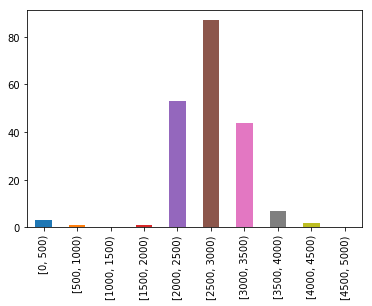

In [7]:
range_list = list(range(0, 5001, 500))
data_cut = pd.cut(xse.values, range_list, right=False)  # 分组区间
frequency = data_cut.value_counts()  # 区间-个数

frequency.plot(kind='bar')
range_list = pd.cut(xse, range_list, right=False)
data['区间'] = range_list.values
data.groupby('区间').median()
data.groupby('区间').mean()  # 每个区间平均数

frequency_df = pd.DataFrame(frequency, columns=['频数'])
frequency_df['频率f'] = frequency_df / frequency_df['频数'].sum()
frequency_df['频率%'] = frequency_df['频率f'].map(lambda x: '%.2f%%' % (x * 100))
frequency_df['累计频率f']=frequency_df['频率f'].cumsum()
frequency_df['累计频率%']=frequency_df['累计频率f'].map(lambda x:'%.4f%%'%(x*100))
print(frequency_df)

#### 2.定性数据的分布分析
对于定性变量，常常根据变量的分类类型来分组，可以采用饼图和条形图来描述定性变量的分布。<br>
饼图每一部分的大小于每一类型的频数成正比；条形图的高度代表每一类型分百分比或频数，它的宽度没有意义。

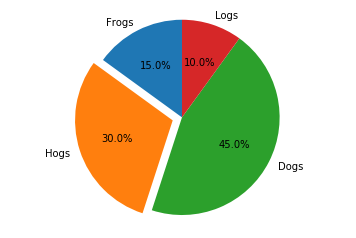

In [8]:
labels = 'Frogs','Hogs','Dogs','Logs'
sizes = [15,30,45,10]
explode = (0,0.1,0,0) # 0.1表示将Hogs那一块凸显出来
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90) #startangle表示饼图的起始角度

plt.axis('equal')  # 这行让长宽比例相等
plt.show()

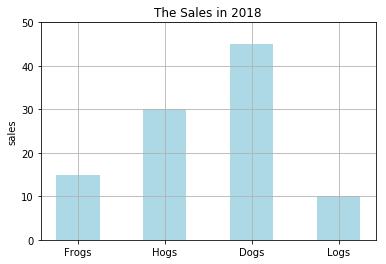

In [9]:
fig = plt.subplot(111)
width = 0.5
x_bar=np.arange(4)
fig.bar(x=x_bar, height=sizes, width=width, color='lightblue')
fig.set_xticks(x_bar)
fig.set_xticklabels(labels)
fig.set_ylabel("sales")
fig.set_ylim(0, 50)
fig.set_title("The Sales in 2018")
fig.grid(True)
plt.show()

### 对比分析
对比分析是值把两个相互联系的指标进行比较，从数量上展示和说明研究对象规模的大小，水平的高低，速度的快慢，以及各种关系是否协调。特别适用于指标间的横纵向比较、时间序列的比较分析。

对比分析主要有一下两种形式：<br>
** （1）绝对数比较**<br>
绝对数比较是利用绝对数进行对比，从而寻找差异的一种方法。

**（2）相对数比较**<br>
相对数比较是由两个有联系的指标对比计算的，用以反映客观现象之间数量联系程度的指标，其数值表现形式为相对数。<br>
- **结构相对数**：将同一总体内的部分数值与全部数值对比求得比重，用以说明失误的性质、结构或质量。如居民食品支出总额比重、产品合格率等。
- **比例相对数**：将同一总体内不同部分的数值进行对比，表面总体内各部分的比例关系。如人口性别比例、投资与消费比例等。
- **比较相对数**：将同一时期两个性质相同的指标数值进行对比，说明同类现象在不同空间条件下的数量对比关系。如不同地区商品价格对比，不同行业、不同企业间某项指标对比等。
- **强度相对数**：将两个性质不同但有一定联系的总量指标进行对比，用以说明现象的强度、密度和普遍程度。如人均生产总值用“元/人”表示，人口密度用“人/平方公里”表示，也有用百分数或千分数标示的，如人口出生率%。表示。
- **计划完成度相对数**：是某一时期实际完成数与计划数的对比，用以说明计划完成程度。
- **动态相对数**：将同以现象在不同时期的指标数值进行对比，用以说明发展方向和变化速度。如发展速度、增长速度等。



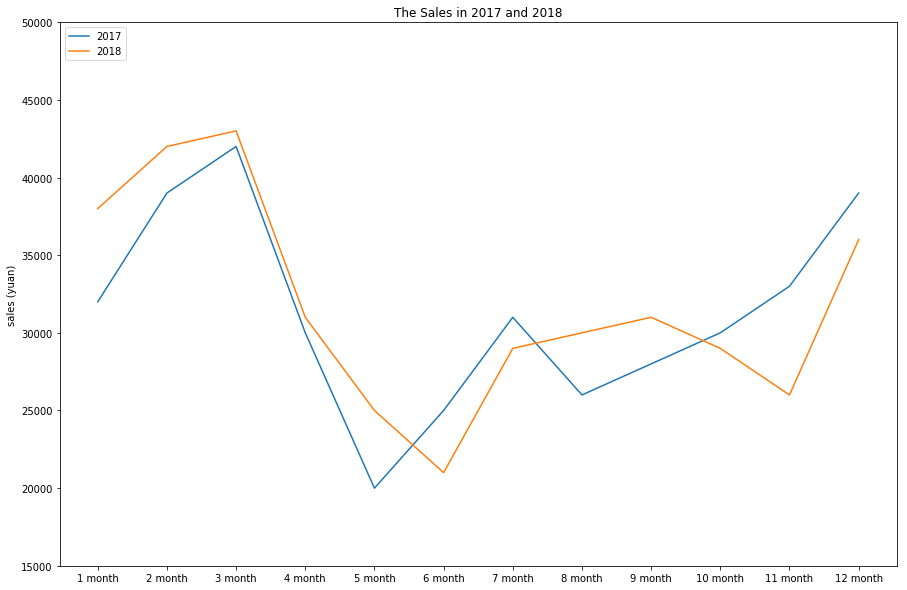

In [10]:
x1 = [32000, 39000, 42000, 30000, 20000, 25000, 31000, 26000, 28000, 30000, 33000, 39000]
x2 = [38000, 42000, 43000, 31000, 25000, 21000, 29000, 30000, 31000, 29000, 26000, 36000]
plt.figure(figsize=(15, 10))
fig = plt.subplot()
fig.plot(np.arange(12), x1, label='2017')
fig.plot(np.arange(12), x2, label='2018')
fig.set_xticks(np.arange(12))
fig.set_xticklabels(['1 month', '2 month', '3 month', '4 month', '5 month', '6 month', '7 month', '8 month', '9 month', '10 month', '11 month', '12 month'])
fig.set_ylim(15000, 50000)
fig.set_ylabel(u"sales (yuan)")
fig.set_title(u"The Sales in 2017 and 2018")
fig.legend(['2017', '2018'], loc=2, ncol=1)
plt.show()

### 统计量分析
用统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析。

#### 集中趋势度量
- **1.均值**<br>
均值是所有数据的平均值。<br>
如果求n个原始观察数据的平均值，计算公式为：$$\rm mean(x) = \bar x = \frac{\sum x_i}{n}$$
有时会用到加权平均值$$\rm mean(x) = \bar x = \frac{\sum \omega_{i}x_i}{\sum \omega_i}$$
类似地，频率分布表的平均数计算公式：$$\rm mean(x) =\bar x = \sum \it f_{i}x_i$$
式中，$x_i$为第i个组段的组中值；$\it f_i$为第i组的频率。

均值对极端值很敏感，如果数据中存在极端值或者数据是偏态分布的，那么均值就不能很好地度量数据的集中程度。为了消除少数极端值的影响，可以使用`截断均值`或者`中位数`来度量数据的集中趋势。截断均值是去掉高、低计算值之后的平均数。


- **2.中位数**<br>
中位数是将一组数据观察值按从小到大的顺序排列，位于中间的那个数。<br>

将某一数据集$x:(x_1,x_2, \dots, x_n)$按从小到大排列：$x_{(1)}, x_{(2)}, \dots, x_{(n)}$。<br>

当n为奇数时$$M = x_{\frac {n+1}{2}}$$
当n为偶数时$$M = \frac{1}{2}(x_{\frac{n}{2}} + x_{\frac{n+1}{2}})$$

- **3.众数**<br>
众数是指数据集中出现最频繁的值。众数并不经常用来度量定性变量的中心位置，更适用于定性变量。众数不具有偶唯一性，一般用于离散型变量而非连续型变量。

#### 离中趋势度量
- **1.极差**<br>
极差对数据集的极端值非常敏感，并且忽略了位于最大值与最小值之间的数据的分布情况。

- **2.标准差**<br>
标准差度量数据偏离均值的程度，计算公式为：$$s = \sqrt{\frac{\sum (x_i - \bar x)^2}{n}}$$

- **3.变异系数**<br>
变异系数度量标准差相对于均值的离中趋势，计算公式为：$$\rm CV = \frac{s}{\bar x} \times 100\%$$
变异系数主要用来比较两个或多个具有不同单位或不同波动幅度的数据集的离中趋势。

- **4.四分位数间距**<br>
四分位数间距，是上四分位数$Q_U$与下四分位数$Q_L$之差，其间包含了全部观察值的一半。其值越大，说明数据的变异程度越大；反之，说明变异程度越小。

In [11]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


### 周期性分析
周期性分析是探索某个变量是否随着时间变化而呈现出某种变化趋势。时间尺度相对较长的周期性趋势有年度周期性趋势、季节性周期趋势，相对较短的有月度周期性趋势、周度周期性趋势，甚至更短的天、小时周期性趋势。

### 贡献度分析（帕累托分析）
贡献度分析又称为帕累托分析，它的原理是帕累托法则，又称为20/80定律。同样的投入放在不同的地方会产生不同的效益。例如，对一个公司来讲，80%的利润常常来自20%最畅销的产品，而对其他80%的产品只产生了20%利润。

下面展示了某餐厅，海鲜系列10个菜品A1～A10某个月的盈利额（已按照从大到小顺序排列）

/home/heolis/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


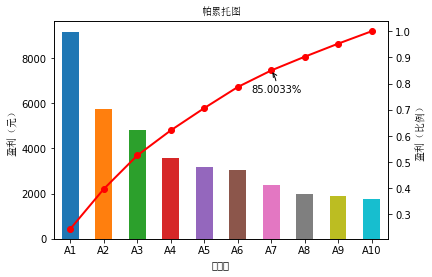

In [34]:
import matplotlib
from matplotlib.font_manager import *
myfont = FontProperties(fname='/home/heolis/SIMSUN.TTC')
matplotlib.rcParams['axes.unicode_minus']=False



dish_profit = 'data/catering_dish_profit.xls' #餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = u'菜品名')
data = data[u'盈利'].copy()
data.sort_values(ascending = False)

plt.figure()
data.plot(kind='bar')
plt.ylabel(u'盈利（元）',fontproperties=myfont)
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel(u'盈利（比例）',fontproperties=myfont)
plt.title(u'帕累托图', fontproperties=myfont)
plt.show()

由上图可知，菜品A1~A7共7个菜品，占菜品种类数的70%，总盈利额占该月盈利额的85.0033%.根据帕累托法则，应该增加菜品A1~A7的成本投入，减少对菜品A8~A10的投入以获得更高的盈利额。

### 相关性分析
分析连续变量之间线性相关程度的强弱。

#### 1.绘制散点图
判断两个变量是否具有线性相关关系的最直观的方法是直接绘制散点图。
![相关关系图示](http://www.2cto.com/uploadfile/2015/1214/20151214020756652.png)

#### 2.绘制散点图矩阵
需要同时考虑多个变量间的相关关系时，利用散点图矩阵同时绘制各变量间的散点图。
![散点图矩阵](http://www.2cto.com/uploadfile/2015/1214/20151214022406586.png)

#### 计算相关系数
在二元变量的相关分析过程中比较常用的有Pearson 相关系数、Spearman 质相关系数、判定系数。

- **1.Pearson 相关系数**<br>
一般用于分析两个连续性变量之间的关系，其计算公式如下。$$r = \frac{\sum ^n_{i = 1}(x_i - \bar x)(y_i - \bar y)}{\sqrt \sum ^n_{i = 1}(x_i - \bar x)^2\sum ^n_{i = 1}(y_i - \bar y)^2}$$
相关系数r的取值范围：$-1 \le r \le 1$
$$\begin{cases}r > 0 &为正相关 \\ r < 0 &为负相关 \\ |r| = 0 &表示不存在线性关系 \\ |r| = 1 &表示完全线性关系 \end{cases}$$
0<|r|<1 表示存在不同程度线性相关：
$$\begin{cases}|r| \le 0.3 & 为不存在线性相关 \\ 0.3 < |r| \le 0.5 & 为低度线性相关 \\ 0.5 < |r| \le 0.8 &为显著线性相关 \\ |r| > 0.8 &为高度线性相关 \end{cases}$$
Pearson线性相关系数要求连续变量服从正态分布。Pearson相关只有在变量具有线性关系时才完全相关。

- **2.Spearman秩相关系数**<br>
不服从正态分布的变量、分类或等级变量之间的关联性可采用Spearman秩相关系数，也称等级相关系数来描述。
其计算公式如下：$$r_s = 1 - \frac{6\sum^n_{i=1}(R_i - Q_i)^2}{n(n^2 - 1)}$$
对两个变量成对的取值分别按照从小到大（或者从大到大小）顺序编秩，$R_i$代表$x_i$的秩次，$Q_i$代表$y_i$的秩次，$R_i-Q_i$为$x_i$、$y_i$的秩次之差。<br><br>
由于一个变量的相同的取值必须有相同的秩次，所以在计算中采用的秩次是排序后所在位置的平均值。<br>
只要两个变量具有严格单调的函数关系，那么它们就是完全Spearman相关的。研究表明，在正态分布假定下，Spearman秩相关系数与Pearson相关系数在效率上是等价的，而对于连续测量数据，更适合用Pearson相关系数来进行分析。

- **3.判定系数**<br>
判定系数是相关系数的平方，用$r^2$表示；用来衡量回归方程对y的解释程度。判定系数取值范围：$0≤r2≤1$。$r^2$越接近于1，表明x与y之间的相关性越强；$r^2$越接近于0，表明两个变量之间几乎没有直线相关关系。

In [38]:
catering_sale = 'data/catering_sale_all.xls' #餐饮数据，含有其他属性
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

data.corr() #相关系数矩阵，即给出了任意两款菜式之间的相关系数
data.corr()[u'百合酱蒸凤爪'] #只显示“百合酱蒸凤爪”与其他菜式的相关系数

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

In [39]:
data[u'百合酱蒸凤爪'].corr(data[u'翡翠蒸香茜饺']) #计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数

0.0092058030518365284